# <font color='teal'>E-News Express</font>

## <font color='teal'>Background: </font>

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## <font color='teal'>Objective:</font>

Perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? Conversion rate is the proportion of users who visit the landing page and get converted.
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests. Assume that the dataset is a simple random sample from the population, and the sample observations are independent of each other.

## <font color='teal'>Data Dictionary:</font>

* **user_id** - This represents the user ID of the person visiting the website.
* **group** - This represents whether the user belongs to the first group (control) or the second group (treatment).
* **landing_page** - This represents whether the landing page is new or old.
* **time_spent_on_the_page** - This represents the time (in minutes) spent by the user on the landing page.
* **converted** - This represents whether the user gets converted to a subscriber of the news portal or not.
* **language_preferred** - This represents the language chosen by the user to view the landing page.

### Import the necessary libraries

In [1]:
# Libaries for reading/manipulating data
import numpy as np
import pandas as pd
# Libraries for data visualization
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [2]:
# Suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

### Load the data set

In [3]:
data = pd.read_csv('abtest.csv')
# make a copy of the data
df = data.copy()

In [4]:
# look at first few rows of dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# look at last few rows of dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Observations
* There are at least 3 distinct languages preferred by the users
* Both control and treatment groups had users that converted and that didn't

### Check the shape and info

In [6]:
# determine number of columns and observations
df.shape

(100, 6)

### Observations
* 100 rows (observations)
* 6 columns

In [7]:
# check info, to see datatype & number of null values
df.info()
# object types may need to be converted, e.g., to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
# double check for missing values
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations
* All columns have 100 observations. No missing values in any variables
* `user_id`, `group`, `landing_page`, `converted`, `language_preferred` should be categorical

### Fixing the datatypes

In [9]:
# Change user_id, landing_page, converted, language_preferred to categorical
df['user_id'] = df.user_id.astype('category')
df['group'] = df.group.astype('category')
df['landing_page'] = df.landing_page.astype('category')
df['converted'] = df.converted.astype('category')
df['language_preferred'] = df.language_preferred.astype('category')

In [10]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(5), float64(1)
memory usage: 6.7 KB


### Summary of data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [12]:
df.describe(exclude='number').T

,count,unique,top,freq
user_id,100,100,546443,1
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [13]:
# distinct values of languages
df.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

In [14]:
# check that control group has old landing page and treatment group has new landing page
df.groupby(by=['group','landing_page']).size()

group      landing_page
control    new              0
           old             50
treatment  new             50
           old              0
dtype: int64

### Observations
* There are 100 distinct users, 50 in control group and 50 in treatment group, as was expected
* The control group has the old landing page and treatment group has the new landing page
* More people converted than didn't, although overall percentage is 54%
* There are 3 distinct languages: English, French, and Spanish. They all have close to the same popularity
* Time spent on the page ranges from 0.19 to 10.71 minutes. The mean time spent was 5.378 minutes with a standard deviation of 2.378 minutes, and the median time was 5.415--slightly above the mean. This would indicate a slight negative skew.

## EDA

In [15]:
# For any numerical variable, it is important to check central tendency and dispersion.
# Define a function to create a boxplot and histogram for an input variable (numerical column).
# Plot the boxplot and histogram on the same scale.
# This function definition was provided by Great Learning

def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins=None):
    '''
    Boxplot and histogram on same scale
    data: dataframe
    feature: datafram column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of b ins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### <font color='navy'>Time Spent on the Page</font>

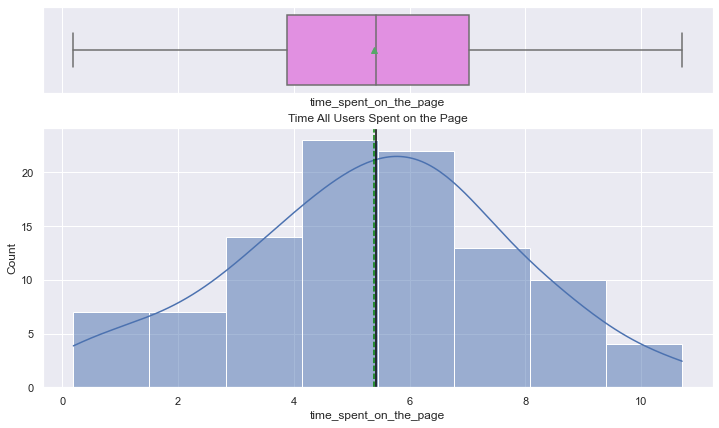

In [16]:
# Plot the boxplot and histogram of time on the same scale
histogram_boxplot(df, 'time_spent_on_the_page')
plt.title('Time All Users Spent on the Page')
plt.savefig('time_all.jpg', bbox_inches='tight')

### CONTROL GROUP

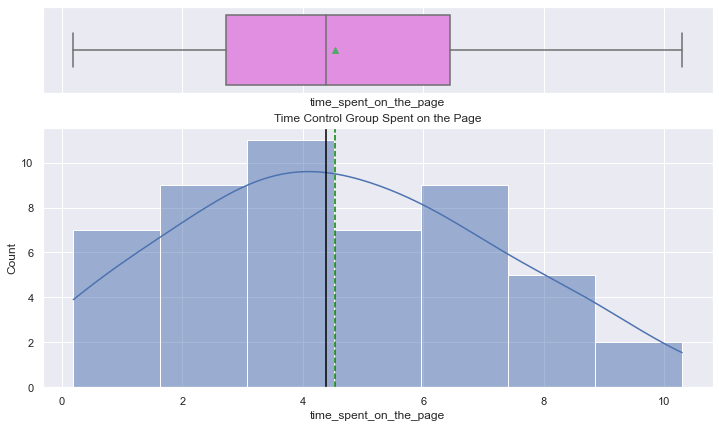

In [17]:
# Plot the boxplot and histogram of time on the same scale
histogram_boxplot(df[df['group']=='control'], 'time_spent_on_the_page')
plt.title('Time Control Group Spent on the Page')
plt.savefig('time_ctrl.jpg', bbox_inches='tight')

### TREATMENT GROUP

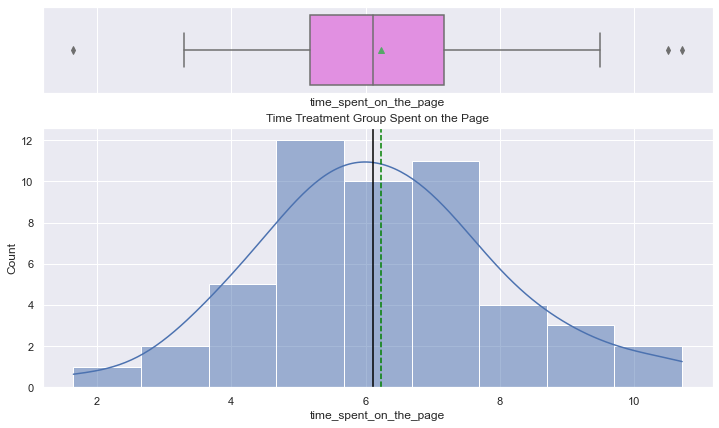

In [18]:
# Plot the boxplot and histogram of time on the same scale
histogram_boxplot(df[df['group']=='treatment'], 'time_spent_on_the_page')
plt.title('Time Treatment Group Spent on the Page')
plt.savefig('time_treat.jpg', bbox_inches='tight')

### Observations
* Overall, the time variable looks approximately normal.
* The control group has lower values for time spent on the page than the treatment group, including min, max, median, and mean
* The means for both control and treatment groups are above the medians for each of the groups respectively
* The treatment group has a few outliers to the left and right

## <font color='navy'>EXPLORE CATEGORICAL VARIABLES</font>

In [19]:
# function to create labeled barplots provided by Great Learning


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=((count + 1)*2, 5))
    else:
        plt.figure(figsize=((n + 1)*2, 5))

    plt.xticks(rotation=45, fontsize=15)
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='navy'>Converted</font>

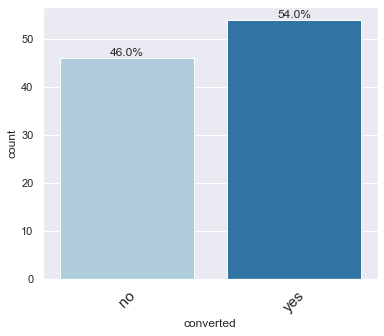

<Figure size 432x288 with 0 Axes>

In [20]:
# Create labeled barplot of Converted
labeled_barplot(df, 'converted', perc=True)
plt.savefig('converted_all.jpg', bbox_inches='tight')

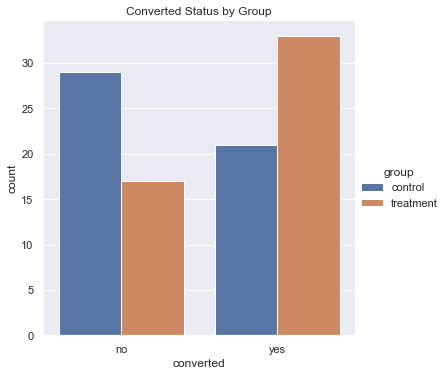

In [21]:
# Created barplot of converted by group
sns.catplot(data = df, x='converted', kind='count', hue='group')
plt.title('Converted Status by Group')
plt.savefig('converted_grouped.jpg', bbox_inches='tight')

### Observations
* There are more converted than not.
* The conversions come predominantly from the treatment group, i.e., the new landing page was more likely to result in a conversion
* The old landing page was more likely to result in no conversion.

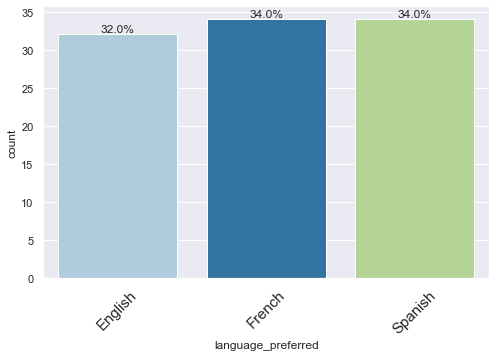

In [22]:
# Create labeled barplot of Language Preferred
labeled_barplot(df, 'language_preferred', perc=True)

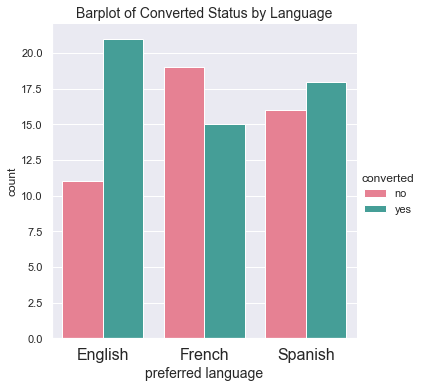

In [23]:
# Create barplot of converted by language preferred
sns.catplot(data=df, x='language_preferred', kind='count', hue='converted', palette='husl')
plt.title('Barplot of Converted Status by Language', fontsize=14)
plt.xlabel('preferred language', fontsize=14)
plt.xticks(fontsize=16)
plt.savefig('converted_lang.jpg', bbox_inches='tight')

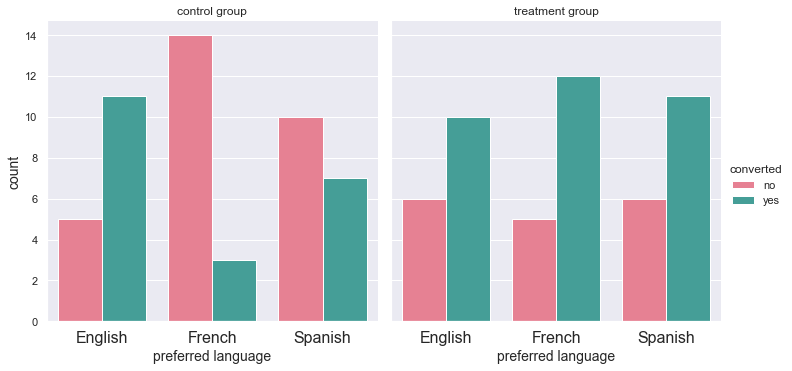

In [24]:
# Create barplot of converted by language preferred, separated by group
g = sns.catplot(data=df, x='language_preferred', kind='count', hue='converted', col='group', palette='husl')
(g.set_axis_labels('preferred language', 'count', fontsize=14)
 .set_titles('{col_name} {col_var}')
 .set_xticklabels(fontsize=16))
plt.savefig('converted_lang_grouped.jpg', bbox_inches='tight')

### Observations
* Those with English preference were more likely to be converted on the old landing page. They preferred the old page more than the new.
* Those with Spanish preference were next most likely to be converted, with more conversions from new page than the old page
* Those with French preference were the least likely to be converted, with much more conversions from the new page. They preferred the new page more than the other language preferences.

<Figure size 1080x576 with 0 Axes>

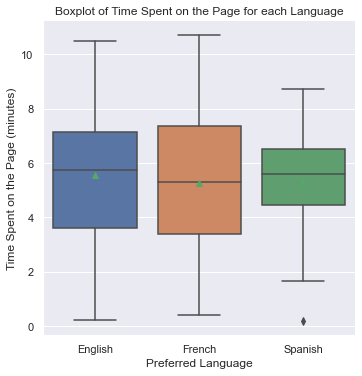

In [25]:
# boxplot of time spent on page for each language
plt.figure(figsize=(15,8))
g = sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', kind='box', showmeans=True)
g.set_axis_labels('Preferred Language','Time Spent on the Page (minutes)')
plt.title('Boxplot of Time Spent on the Page for each Language')
plt.savefig('time_lang.jpg', bbox_inches='tight')
plt.show()

<Figure size 1080x576 with 0 Axes>

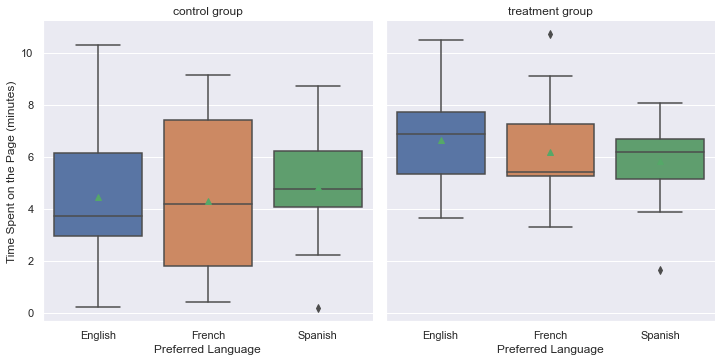

In [26]:
# boxplot of time spent on page by preferred language, separated by group
plt.figure(figsize=(15,8))
g = sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page',
                kind='box', col='group', showmeans=True)
(g.set_axis_labels('Preferred Language','Time Spent on the Page (minutes)')
 .set_titles('{col_name} {col_var}'))
plt.savefig('time_lang_grouped.jpg', bbox_inches='tight')
plt.show()

<Figure size 1080x576 with 0 Axes>

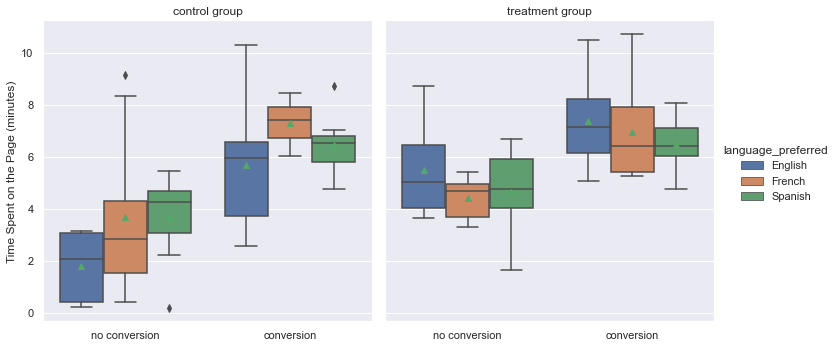

In [27]:
# boxplot of time spent on page for each language by conversion status, separated by group
plt.figure(figsize=(15,8))
g= sns.catplot(data=df, hue='language_preferred', y='time_spent_on_the_page', x='converted', 
               kind='box', col='group', showmeans=True)
(g.set_axis_labels('','Time Spent on the Page (minutes)')
 .set_titles('{col_name} {col_var}')
 .set_xticklabels(['no conversion', 'conversion']))
plt.savefig('time_lang_status_grouped.jpg', bbox_inches='tight')
plt.show()

<Figure size 1080x576 with 0 Axes>

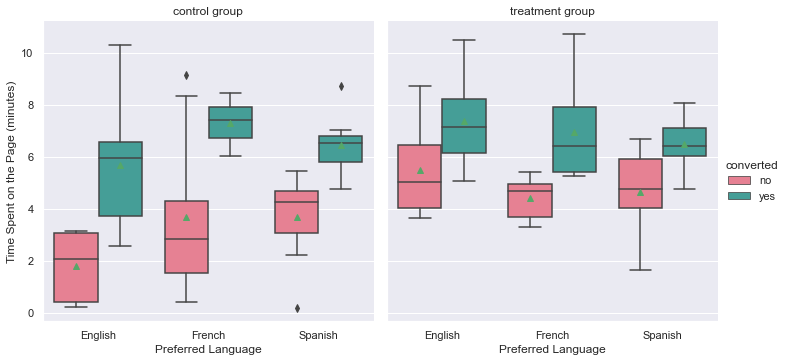

In [28]:
# boxplot of time spent on page by preferred language, separated by group with conversion status hue
plt.figure(figsize=(15,8))
g = sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='converted', 
                kind='box', col='group', showmeans=True, palette='husl')
(g.set_axis_labels('Preferred Language','Time Spent on the Page (minutes)')
 .set_titles('{col_name} {col_var}'))
plt.savefig('time_lang_grouped_status.jpg', bbox_inches='tight')
plt.show()

### Observations
* Time spent on the page does not seem to differ overall, between English language & French language users
* Range appears different for Spanish language users, but mean & median time seem similar
* When split by groups and conversion status, we see 
    - Spanish language users spent the most time on the old landing page without being converted to a subscriber than the other languages
    - French language users spent the most time on the old landing page to be converted to a subscriber
    - English language users spent the most time on the new landing page both for converted and non-converted
    - It appears there is a time threshold that each landing page must cross in order for the user to become converted to a subscriber

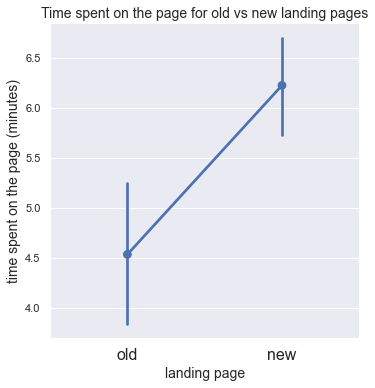

In [29]:
# draw point-plot of mean time spent on the page for old page vs new page
sns.catplot(data=df, x='landing_page', y='time_spent_on_the_page', kind='point', order=['old', 'new'])
plt.title('Time spent on the page for old vs new landing pages', fontsize=14)
plt.xlabel('landing page', fontsize=14)
plt.ylabel('time spent on the page (minutes)', fontsize=14)
plt.xticks(fontsize=16)
plt.savefig('time_landing.jpg', bbox_inches='tight')
plt.show()

### Observation:
* It appears that users spend more time on the new landing page than the old

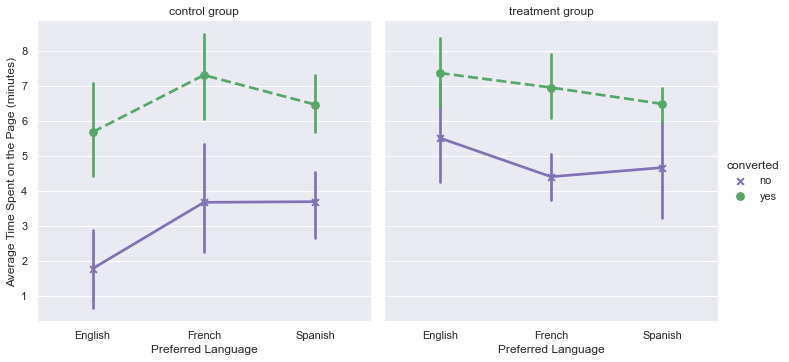

In [30]:
# plot side-by-side point-plots of mean time spent on the page by preferred language, for each group
g = sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='converted', 
            palette={'no': 'm', 'yes': 'g'}, markers=['x', 'o'], linestyles=['-','--'], kind='point', col='group')
(g.set_axis_labels('Preferred Language', 'Average Time Spent on the Page (minutes)')
 .set_titles('{col_name} {col_var}'))
plt.savefig('time_lang_group_mean.jpg', bbox_inches='tight')
plt.show()

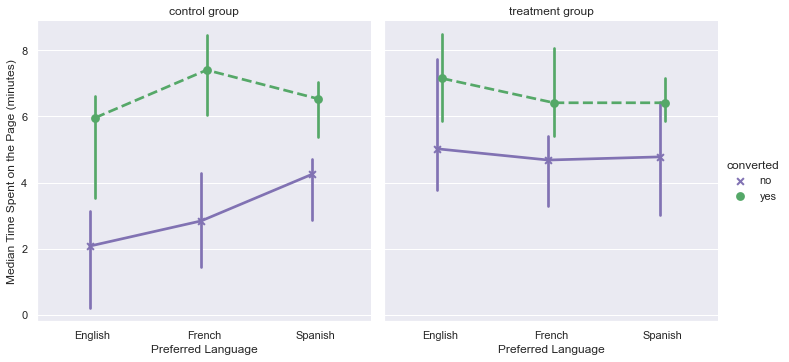

In [31]:
# plot side-by-side point-plots of median time spent on the page by preferred language, for each group
from numpy import median
g = sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='converted', 
            palette={'no': 'm', 'yes': 'g'}, markers=['x', 'o'], linestyles=['-','--'], kind='point', 
            col='group', estimator=median, dodge=True)
(g.set_axis_labels('Preferred Language','Median Time Spent on the Page (minutes)')
 .set_titles('{col_name} {col_var}'))
plt.savefig('time_lang_group_median.jpg', bbox_inches='tight')
plt.show()

### Observations
* Users who end up converting spend more time on the page
* Users on new page spend more time on the page than user on old page

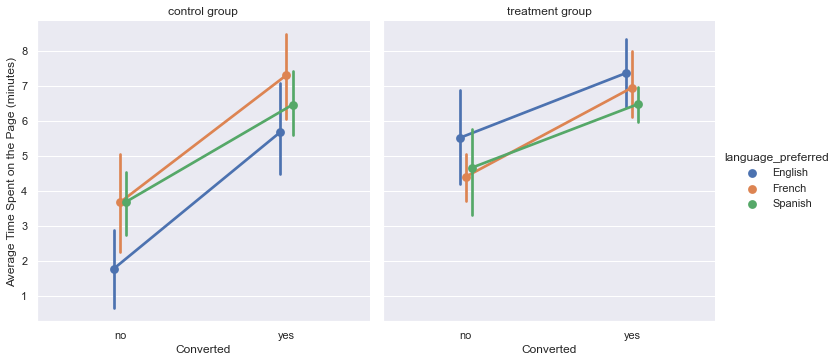

In [32]:
# plot side-by-side point-plots of mean time spent on the page by conversion status, for each group
g = sns.catplot(data=df, hue='language_preferred', y='time_spent_on_the_page', x='converted', kind='point', 
            col='group', dodge=True)
(g.set_axis_labels('Converted','Average Time Spent on the Page (minutes)')
 .set_titles('{col_name} {col_var}')
)
plt.savefig('time_status_group_mean.jpg', bbox_inches='tight')
plt.show()

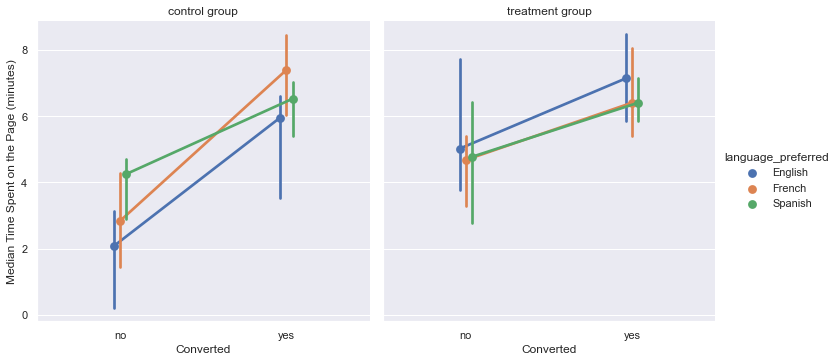

In [33]:
# plot side-by-side point-plots of median time spent on the page by conversion status, for each group
g = sns.catplot(data=df, hue='language_preferred', y='time_spent_on_the_page', x='converted', kind='point', 
            col='group', dodge=True, estimator=median)
(g.set_axis_labels('Converted', 'Median Time Spent on the Page (minutes)')
 .set_titles('{col_name} {col_var}')
)
plt.savefig('time_status_group_median.jpg', bbox_inches='tight')
plt.show()

### Observations
* Means & medians of time spent on the page does not seem to differ between preferred language

## <font color='navy'>Do the users spend more time on the new landing page than the old landing page?</font>

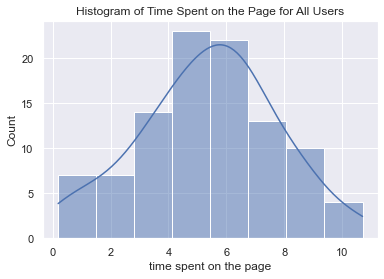

In [34]:
# plot histogram of time spent on the page
sns.histplot(df['time_spent_on_the_page'], kde=True)
plt.title('Histogram of Time Spent on the Page for All Users')
plt.xlabel('time spent on the page')
plt.savefig('time_hist.jpg', bbox_inches='tight')

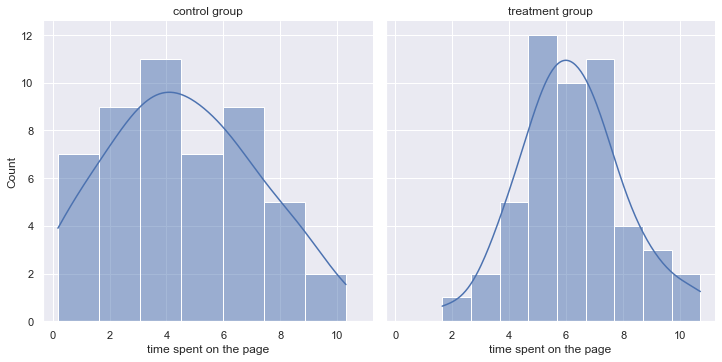

In [35]:
# plot side-by-side plots of histograms for time spent on the page for control & treatment groups
g = sns.FacetGrid(df, col="group", height=5)
g.map_dataframe(sns.histplot, x="time_spent_on_the_page", kde=True)
(g.set_xlabels('time spent on the page')
 .set_ylabels('Count')
 .set_titles('{col_name} {col_var}'))
plt.show()

### Step 1: Define Null and Alternative Hypotheses

Let $$\mu_1=\text{average time spent on the old landing page,}$$ $$\mu_2=\text{average time spent on the new landing page.}$$

We will test the null hypothesis
>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis
>$H_1: \mu_1 < \mu_2$

In other words,
>$H_0:$ The amount of time spent on the new and old landing pages does not differ

>$H_1:$ Users spend more time on the new landing page than the old landing page

In [36]:
# Find the sample means and sample standard deviations
print('The mean usage time for the old landing page is approximately', 
      round(df[df['group']=='control']['time_spent_on_the_page'].mean(),2), 'minutes')
print('The mean usage time for the new landing page is approximately', 
      round(df[df['group']=='treatment']['time_spent_on_the_page'].mean(),2), 'minutes')
print('The standard deviation of usage time for the old landing page is approximately', 
      round(df[df['group']=='control']['time_spent_on_the_page'].std(),2), 'minutes')
print('The standard deviation of usage time for the new landing page is approximately', 

      round(df[df['group']=='treatment']['time_spent_on_the_page'].std(),2), 'minutes')

The mean usage time for the old landing page is approximately 4.53 minutes
The mean usage time for the new landing page is approximately 6.22 minutes
The standard deviation of usage time for the old landing page is approximately 2.58 minutes
The standard deviation of usage time for the new landing page is approximately 1.82 minutes


### Step 2: Select appropriate test
This is a case of a two independent sample $t$-test for equality of means with unequal standard deviations. The alternate hypothesis is one-tailed.
### Step 3: Decide the significance level
As given in the problem statment, we select $\alpha=0.05$

### Step 4: Check $t$-test assumptions
* Continuous data - **Yes**, the usage time is measured on a continuous scale
* Normally distributed populations - **Yes**, the distributions of the two samples are relatively bell-shaped and there are no outliers. Additionally, the sample size $n>30$, and thus, by the Central Limit Theorem, the normality assumption is satisfied.
* Independent populations - **Yes**, we are taking samples from two different groups of users, from two independent populations.
* Unequal standard deviations - **Yes**, as the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling fromt he population - **Yes**, we are informed that the collected sample is a simple random sample.

We will run an independent two-sample $t$-test.

### Step 5: Find the $p$-value

In [37]:
# import the required functions
from scipy.stats import ttest_ind

# fine the p-value
test_stat, p_value = ttest_ind(df[df['group']=='control']['time_spent_on_the_page'], 
                               df[df['group']=='treatment']['time_spent_on_the_page'],
                              equal_var = False, alternative = 'less')
print('The p-value is', str(p_value))

The p-value is 0.0001392381225166549


### Step 6: Compare the $p$-value with $\alpha$

In [38]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw Inference
As the $p$-value is less than the level of significance we can reject the null hypothesis. Hence, <font color='teal'>**we have enough evidence to support the claim that users spend more time on the new landing page.**</font>


## <font color='navy'>Is the conversion rate for the new page greater than the conversion rate for the old page?</font>
### Step 1: Define Null and Alternative Hypotheses
Let $p_1, p_2$ be the proportion of conversions for the old page and the new page, respectively. The news portal wants to test the null hypothesis
>$H_0: p_1=p_2$

against the alternative hypothesis
>$H_1: p_1<p_2$

In [39]:
# Create a contingency table of converted status and group
data_crosstab1 = pd.crosstab(df['group'], df['converted'])
data_crosstab1

converted,no,yes
group,,
control,29,21
treatment,17,33


In [40]:
# Create a contingency table of converted status proportions for each group
data_crosstab2 = pd.crosstab(df['group'], df['converted'], normalize='index')
data_crosstab2

converted,no,yes
group,,
control,0.58,0.42
treatment,0.34,0.66


### Step 2: Select appropriate test
This is a case of a 2 proportion $z$-test, as we are comparing two proportions.

### Step 3: Decide the significance level
As given in the problem statement, we select $\alpha=0.05$

### Step 4: Check $z$-test assumptions
* Binomially distributed population - **Yes**, each user either is converted or not converted
* Random sampling from the population - **Yes**, we are informed that the collected sample is a simple random sample
* Can the binomial distribution be approximated to normal distribution - **Yes**, we check whether $np\geq10$ and $n(1-p)\geq10$, where $n=$ sample size and $p=$ sample proportion.
>$n_1p_1=50\cdot0.42=21\geq10\\
n_1(1-p_1)=50\cdot0.58=29\geq10\\
n_2p_2=50\cdot0.66=33\geq10\\
n_2(1-p_2)=50\cdot0.34=17\geq10$


### Step 5: Find the $p$-value

In [41]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted
convert_count = np.array([21,33])

# set the sample sizes
nobs = np.array([50,50])

# find the p-value
test_stat, p_value = proportions_ztest(convert_count, nobs, alternative='smaller')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the $p$-value with $\alpha$

In [42]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw Inference
As the $p$-value is less than the level of significance, we have enough statistical evidence to reject the null hypothesis and conclude that <font color='teal'>**the conversion rate for the new landing page is greater than that of the old page.**</font>

## <font color='navy'>Does the converted status depend on the preferred language?</font>

In [43]:
# Create a contingency table of converted status and preferred language
data_crosstab3 = pd.crosstab(df['converted'], df['language_preferred'], margins=False)
data_crosstab3

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [44]:
# Create a contingency table of converted status proportions for each language
data_crosstab4 = pd.crosstab(df['converted'], df['language_preferred'], normalize='columns')
data_crosstab4

language_preferred,English,French,Spanish
converted,,,
no,0.34375,0.558824,0.470588
yes,0.65625,0.441176,0.529412


### Step 1: Define Null and Alternative Hypotheses
We test the null hypothesis
>$H_0:$ Converted status is independent of preferred language

against the alternate hypothesis
>$H_1:$ Converted status depends on preferred language

### Step 2: Select Appropriate Test
This is a case of a Chi-square test of independence, to determine if two categorical variables are independent of each other.

### Step 3: Decide the significance level
As given in the problem statement, we select $\alpha=0.05$.

### Step 4: Check $\chi^2$-test assumptions
* Categorical variables - **Yes**, both converted statust and preferred language are categorical
* Expected value of the number of sample observations in each level of the variable is at least 5 - **Yes**, the number of observations in each level is greater than 5
* Random sampling from the population - **Yes**, we are informed that the collected sample is a simple random sample

### Step 5: Find the $p$-value

In [45]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(data_crosstab3)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the $p$-value with $\alpha$

In [46]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw Inference
At the 5% significance level, we fail to reject the null hypothesis. Hence, we **do not** have enough statistical evidence to say that converted status depends on the preferred language.

## <font color='navy'>Is the mean time spent on the new page same for the different language users?</font>

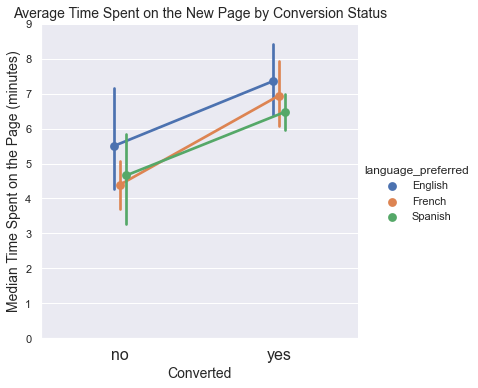

In [47]:
# draw point-plot of mean time spent on the page by conversion status for new landing page
sns.catplot(data=df[df['landing_page']=='new'], hue='language_preferred', y='time_spent_on_the_page', x='converted', 
            kind='point', dodge=True)
plt.ylim(0,9)
plt.xlabel('Converted', fontsize=14)
plt.ylabel('Median Time Spent on the Page (minutes)', fontsize=14)
plt.title('Average Time Spent on the New Page by Conversion Status', fontsize=14)
plt.xticks(fontsize=16)
plt.savefig('time_status_treat.jpg', bbox_inches='tight')
plt.show()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


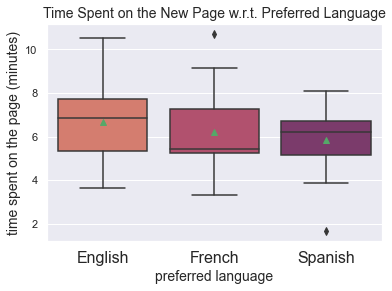

In [48]:
# mean of time spent on the new page for different language preferences
print(df[df['group']=='treatment'].groupby('language_preferred')['time_spent_on_the_page'].mean())

# draw the boxplot for visualization
# boxplot of time spent on page
sns.boxplot(data=df[df['group']=='treatment'], x='language_preferred', y='time_spent_on_the_page',
                showmeans=True, palette='flare')
plt.title('Time Spent on the New Page w.r.t. Preferred Language', fontsize=14)
plt.xticks(fontsize=16)
plt.xlabel('preferred language', fontsize=14)
plt.ylabel('time spent on the page (minutes)', fontsize=14)
plt.savefig('time_lang_box.jpg', bbox_inches='tight')
plt.show()

### Step 1: Define Null and Alternative Hypotheses
Let $\mu_1, \mu_2, \mu_3$ be the mean time spent on the new page for the users who prefer English, French, and Spanish, respectively. We will test the null hypothesis
>$H_0:\mu_1=\mu_2=\mu_3$

against the alternative hypothesis
>$H_1$: At least one language preference is different from the others for mean time spent on the new page.

### Step 2: Select appropriate test
This is a problem concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.
* For testing of normality, Shapiro-Wilk's test is applied to the response variable
* For equality of variance, Leven's test is applied to the response variable.

The normality and equality of variance assumptions need to be checked.
* For testing of normality, Shapiro-Wilk's test is applied to the response variable.
* For equality of variance, Levene's test is appiled to the response variable.

### Shapiro-Wilk's test
We will test the null hypothesis
>$H_0$: Time spent on the page follows a normal distribution

against the alternative hypothesis
>$H_1$: Time spent on the page does not follow a normal distribution

In [49]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df[df['group']=='treatment']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since the $p$-value is very large, we fail to reject the null hypothesis and conclude that time spent on the page follows a normal distribution

### Levene's test
We will test the null hypothesis
>$H_0$: All population variances are equal

against the alternative hypothesis
>$H_1$: At least one variance is different from the rest

In [50]:
# Assumption 2: Homogeneity of Variance
# import the required function
from scipy.stats import levene

# find the p-value
test_stat, p_value = levene(df[(df['group']=='treatment') & (df['language_preferred']=='English')]['time_spent_on_the_page'],
                             df[(df['group']=='treatment') & (df['language_preferred']=='French')]['time_spent_on_the_page'],
                             df[(df['group']=='treatment') & (df['language_preferred']=='Spanish')]['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the $p$-value is very large, we fail to reject the null hypothesis of homogeneity of variance.

### Step 3: Decide the significance level
As given in the problem statement, we select $\alpha=0.05$

### Step 4: Check One-way ANOVA test assumptions
* The populations are normally distributed - **Yes**, the normality assumption is verified using the Shapiro-Wilk's test
* Samples are independent simple random samples - **Yes**, we are informed that the collected sample is a simple random sample
* Population variances are equal - **Yes**, the homogeneity of variance assumption is verified using the Levene's test

### Step 5: Find the $p$-value

In [51]:
# import the required function
from scipy.stats import f_oneway

# perform one-way ANOVA test
test_stat, p_value = f_oneway(df.loc[(df['group']=='treatment') & (df['language_preferred']=='English'), 'time_spent_on_the_page'],
                             df.loc[(df['group']=='treatment') & (df['language_preferred']=='French'), 'time_spent_on_the_page'],
                             df.loc[(df['group']=='treatment') & (df['language_preferred']=='Spanish'), 'time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the $p$-value with $\alpha$

In [52]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference
As the $p$-value is much greater than the level of signicance we fail to reject the null hypothesis and conclude that the mean time spent on the new page is the same for different language users.

## Further investigation
Is there enough data to investigate if time spent for conversions has decreased from old to new page?

In [53]:
# Create a contingency table of converted status and preferred language for just the old page
data_crosstab5 = pd.crosstab(df[df['landing_page']=='old']['converted'], 
                             df[df['landing_page']=='old']['language_preferred'], margins=False)
data_crosstab5

language_preferred,English,French,Spanish
converted,,,
no,5,14,10
yes,11,3,7


In [54]:
# Create a contingency table of converted status and preferred language for just the new page
data_crosstab6 = pd.crosstab(df[df['landing_page']=='new']['converted'], 
                             df[df['landing_page']=='new']['language_preferred'], margins=False)
data_crosstab6

language_preferred,English,French,Spanish
converted,,,
no,6,5,6
yes,10,12,11


* There is not enough data to investigate whether time spent for conversions has decreased from old to new page.